Exploratory Data Analysis of Titanic Dataset


Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Dataset

In [11]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
type(titanic)

pandas.core.frame.DataFrame

Understanding the Data

Variable Notes
survival:
- Ideal variable type: Categoical
- 0 = No
- 1 = Yes

pclass: Aproxy for socio-economic status(SES)
- Ideal variable type: Categorical
- 1= Upper Class
- 2= Middle Class
- 3= Lower Class

Sex:
- Ideal Variable type : Categorical
- male = male traveller
- female = female traveller

Age:
- Ideal variable type: Continous
- Age is factorial if less than 1
- If the age is estimated, is it in the form of xx.5

sibsp: Familyy Relations onboard the ship:
- Ideal variable type: Categorical
- Sibling = Brother, Sister, Stepbrother, Stepsister
- Spouse = husband, wife(misteresses and finances were ignored)
- The integer number indicated group size of these family relation on board the shhip including brother/ sister/ stepbrother/ stepsister/ husband and wwife

parch: Second type of familyy relations on board the ship:
- Ideal variable type: Categoriacal
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny,  therefore parch=0 for them
- The integer Number indicates group size of these family relations on board the ship including brother/ sister/ stepbrother/ stepsister/ husband and wife

fare: Shows the amount that was paid by the individual to purchase the tickets:
- Ideal variable type: Continous

embarked, embark_town: Shows the port name of the passenger arrivaal:
- Ideal variable type: Both variables are Categorical variables
- embark_town: Shows the name of the town
- embarked: Shows port code of the town

class: Shows cabin class of the passenger
- Ideal variable type: Categorical
- first: first class cabin
- second: second class cabin
- third: third class cabinn

Who: Shows the type of the passengers;
- Ideal variable type; Categorical
- man: male aged 18 or above
- woman: female aged 18 or above
- child: males and females below 18 years of ages

adult_male: Shows whether the male is adult  or not:
- Ideal Variable Type: Categorical
- The column seems to be a repetation of column "who" and hence may be redundant. No such record exsists in the dataset that is "male" in the column and "False"in adult_male column.

deck: Shows the deck category of passenger
- Ideal variable type: Categorical
- Has values from A to G.

alive:
- Ideal variable type: Categorical
- Has either "yes" or "no" as values. It seems  to be a repetation of "survived' column

alone:
- Ideal variable type: Boolean
- Whether the passenger travelled alone or not.




In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


OBERSATIONS:
-  Missing values observed in age, embarked, deck,embark_town
-  Total file size is 80.6 KB

In [19]:
#According to above data, column "adult_male' seems to be a redundant column with the same information 
#Available from "who" column too. Recomfirming this information.

titanic[(titanic["who"]=="man") & (titanic["adult_male"]== False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [23]:
#Hence, dropping the column "adult_male":

titanic.drop(labels=["adult_male"], axis = 1, inplace=True)

In [25]:
#Column "alive" seems to be same as column "survived". Reconfirming this fact:

titanic[(titanic["alive"]=="yes") & (titanic["survived"]==0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone


In [27]:
#Thus, we don't have any value that shows "alive states" as yes and survived status as 0 thusproving its a duplicate column
#Hence, dropping "alive" column:

titanic.drop(labels= "alive", axis= 1, inplace= True)

In [31]:
# 'embarked" and "embark_town" are  duplicate columns with the same information. Dropping the "embarked" column:

titanic.drop(labels= ["embarked"], axis= 1, inplace= True)

In [33]:
# Analyzing the data in "class" and "pclass":


In [35]:
titanic["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [37]:
titanic["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [39]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
deck           688
embark_town      2
alone            0
dtype: int64

OBSERVATONS:
- Null values in abundance for ages and deck
- Couple of missing values in "embark_town"

In [42]:
titanic.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
deck           0.772166
embark_town    0.002245
alone          0.000000
dtype: float64

OBSERVATIONS:
- Close to 20% null values in age

- 77% + null values in deck

- 0.2% null values in embark_town


Addressing Missing Dta: AGE (20% missing values) - Imputing the value

In [46]:
# Median and Mode values of age are found to  be equal

print("Number of entries where age is equal to median age:", len(titanic[titanic["age"]== titanic["age"].median()]))

Number of entries where age is equal to median age: 25


In [48]:
#Hence, imputing the isnull values in age column with median age:

titanic["age"].fillna(titanic["age"].median(), inplace= True)

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2089117019.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace= True)


Adressing Missing Data: EMBARK_TOWN(0.2% missing values)-Frequent Category Imputation

In [51]:
print("The most frequently occuring value of embark_town is", titanic["embark_town"].mode()[0],"which occurs", titanic["embark_town"].value_counts().sort_values(ascending= False)[0], "times.")
print("Hence, replacing null values in embark_town with", titanic["embark_town"].mode()[0],".")

The most frequently occuring value of embark_town is Southampton which occurs 644 times.
Hence, replacing null values in embark_town with Southampton .


C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2382361771.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The most frequently occuring value of embark_town is", titanic["embark_town"].mode()[0],"which occurs", titanic["embark_town"].value_counts().sort_values(ascending= False)[0], "times.")


In [53]:
titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace= True)

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2628304341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace= True)


Addressing Missing Data: DECK(77% missing values) - Dropping the column

In [56]:
#Since the missing values percentage is extremely high, researcher has decided to  drop the entire column

In [58]:
titanic.drop(labels= ["deck"],  axis=1, inplace= True)

In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   embark_town  891 non-null    object  
 10  alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.6+ KB


OBSERVATIONS:
- Number of columns have been reduced from existing 15 to 9
- Memory usage has been reduced from 80 KB to  63 KB (12% reduction in memory space usage)

In [64]:
# Following data is now ready for analysis:

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,Southampton,True


BIG PICTURE OF DATA

In [69]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


FINAL DATASET

In [72]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,Southampton,True


THE BIG PICTURE - PASSENGER HIGHLIGHTS

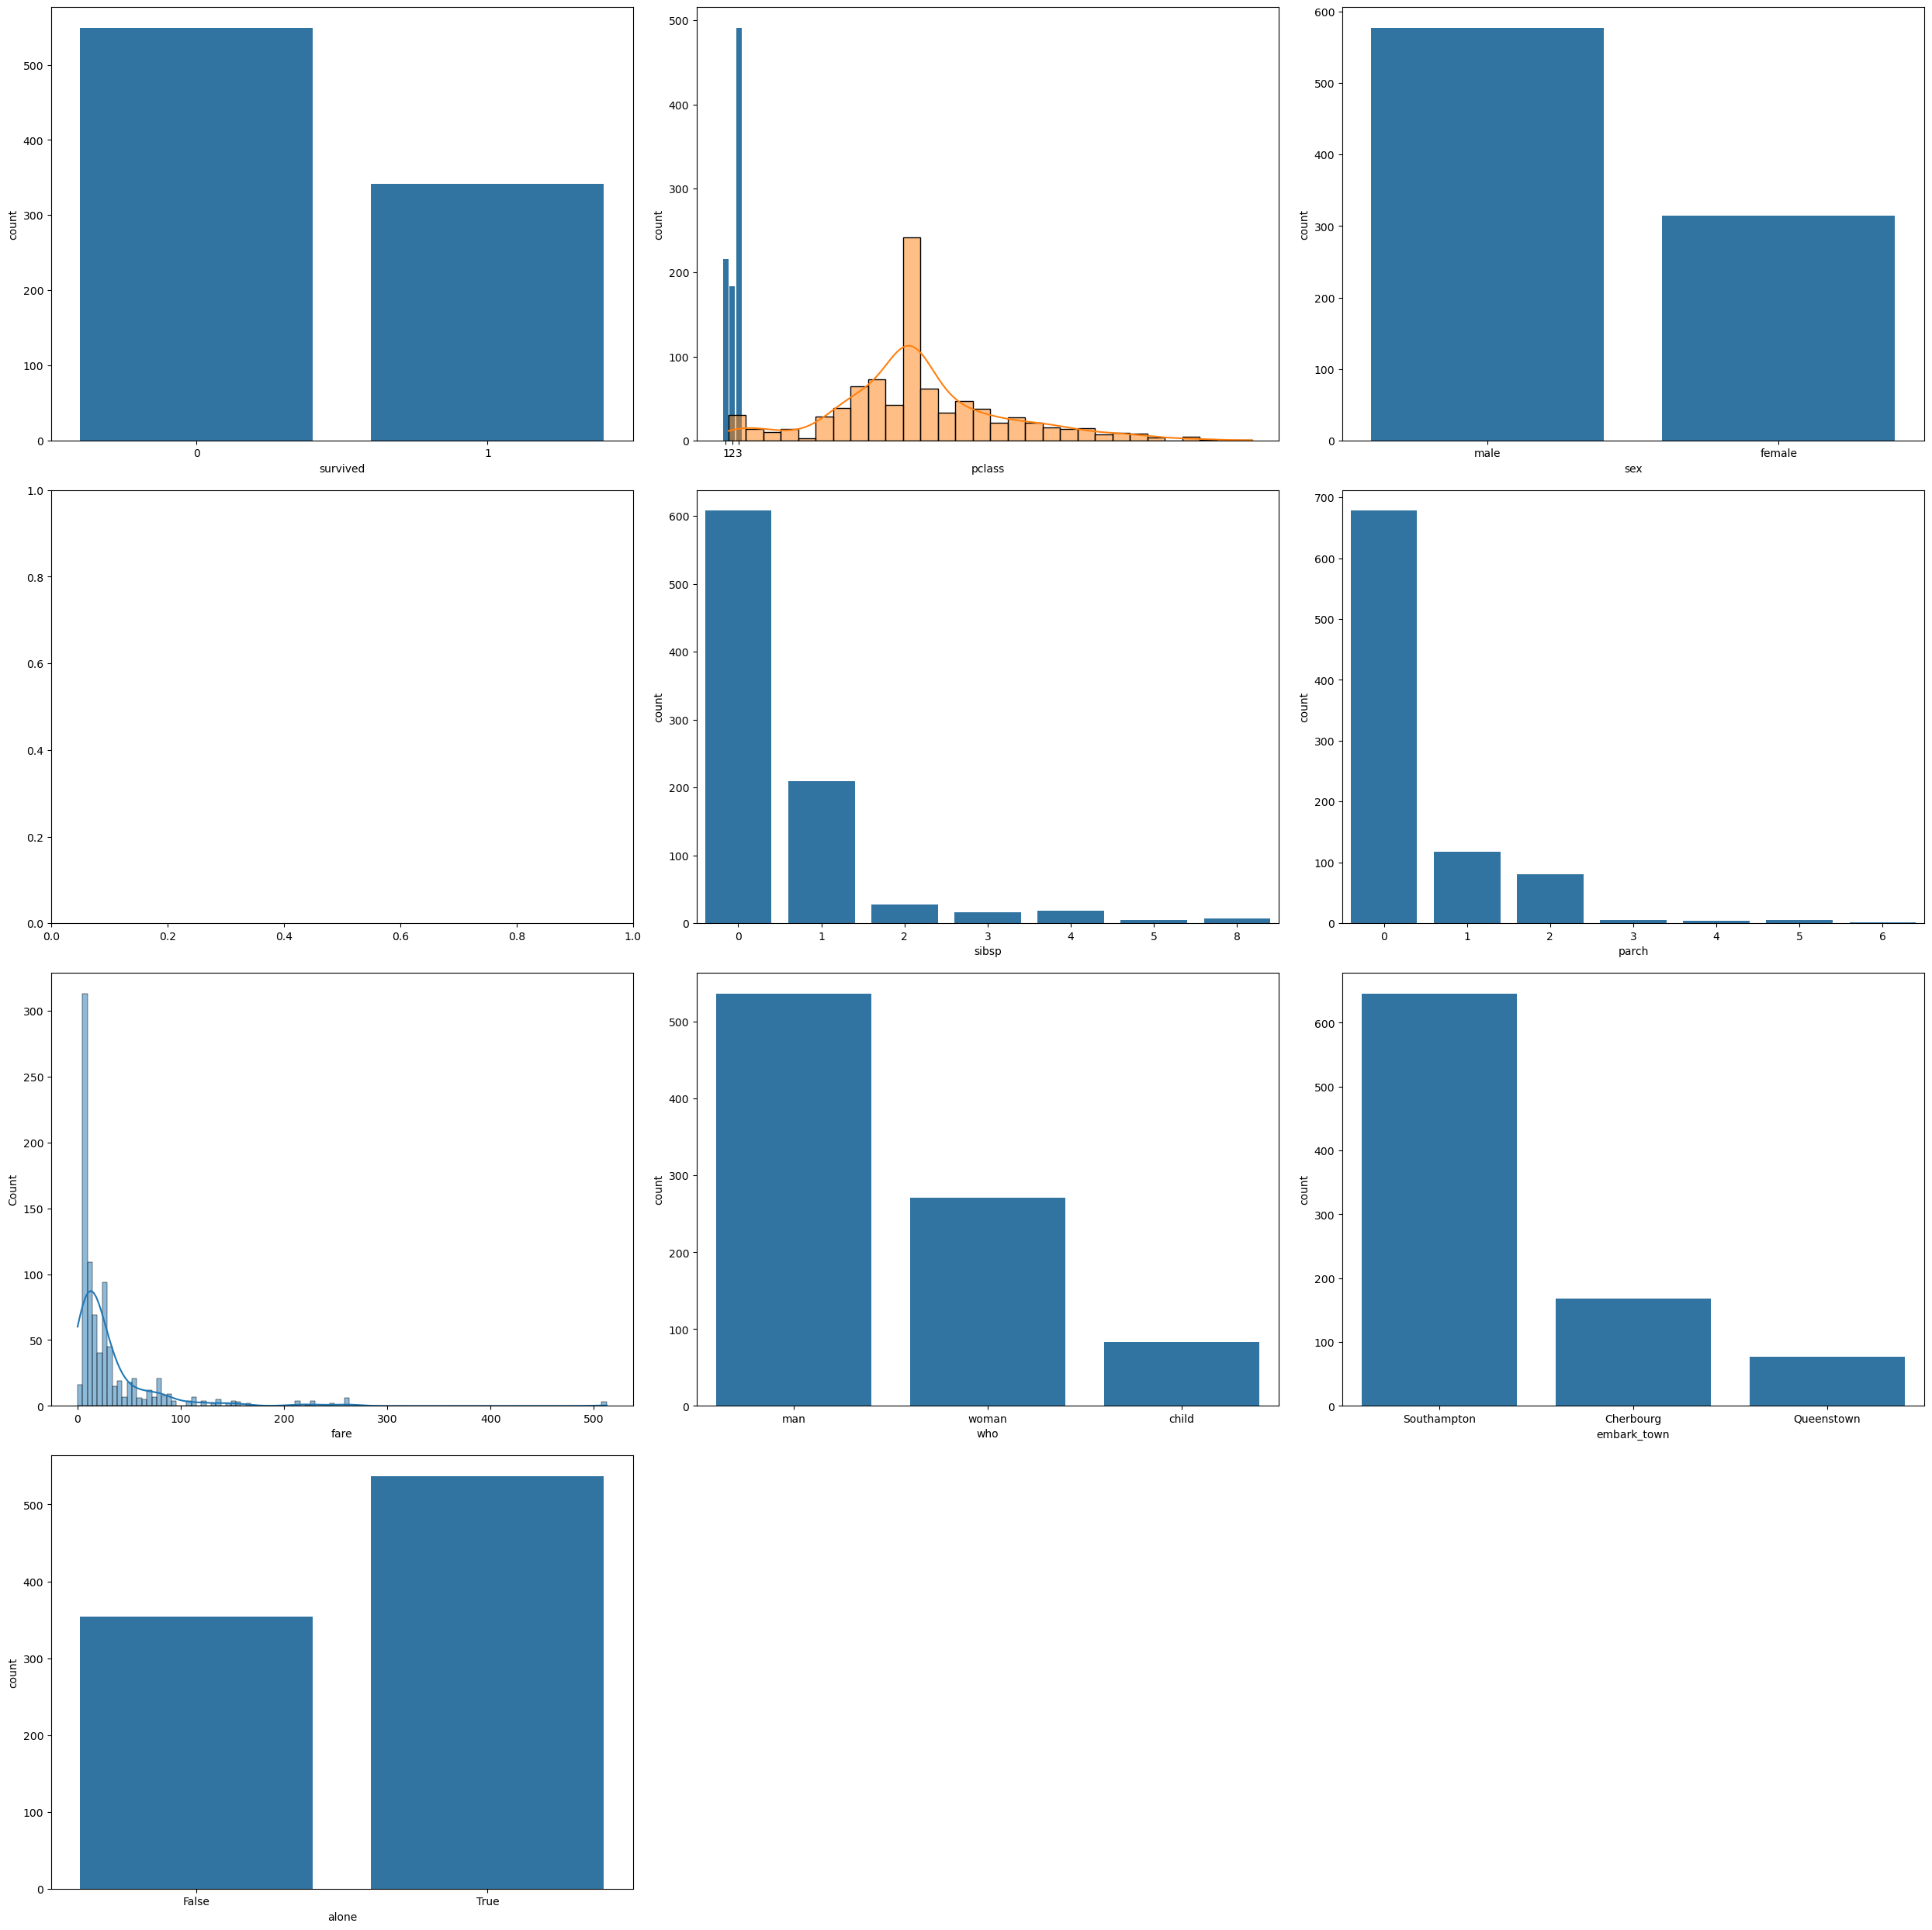

In [77]:
fig, ax= plt.subplots(nrows=  4, ncols= 3,figsize= (25,25))
fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])

ax1=  sns.countplot(x= "survived", data= titanic, ax= ax[0][0])
# ax1.set(xlabel= "ABC")
sns.countplot(x= "pclass", data= titanic, ax= ax[0][1])
sns.countplot(x= "sex", data= titanic, ax= ax[0][2])
sns.histplot(x= "age", data= titanic, kde=True, ax= ax[0][1])
sns.countplot(x= "sibsp", data= titanic, ax= ax[1][1])
sns.countplot(x= "parch", data= titanic, ax= ax[1][2])
sns.histplot(x= "fare", data= titanic, ax= ax[2][0], kde=True)
sns.countplot(x= "who", data= titanic, ax= ax[2][1])
sns.countplot(x= "embark_town", data= titanic, ax= ax[2][2])
sns.countplot(x= "alone", data= titanic, ax= ax[3][0])

plt.tight_layout()
plt.show()


OBSERVATIONS:
- Survival rate much lesser than decrease rate
- Number of passengers in class 3> class 1> class 2
- Male passengers were almost double the female passengers
- Maximum people were 28-29 years old
- The large the groupsize of sibling and spouse, the lesser the number of such people
- The larger the groupsize of parents and children, the lesser the number of such people
- Most of the fares were below 50 USD
- Maximum people embarked from Southamptron followed by Cherbourg followed by Queenstown
- 500+ people were travelling alone against around 360 people who were travelling in the group


In [80]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DEMORGRAPHIC STUDY

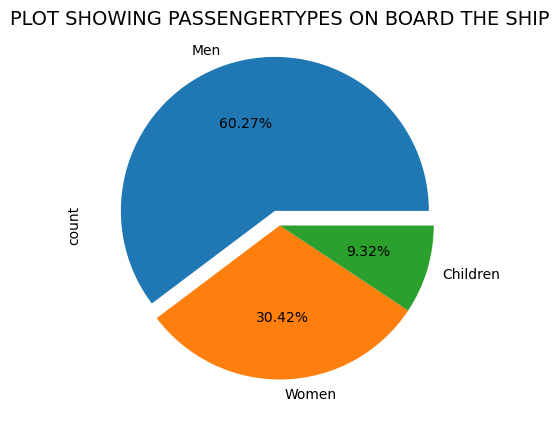

In [93]:
titanic["who"].value_counts().plot.pie(autopct= "%1.2f%%", figsize= (5,5), labels= ["Men", "Women", "Children",], explode= [0.1, 0, 0])
plt.title("Plot showing passengertypes on board the ship".upper(), fontsize= 14)
plt.show()

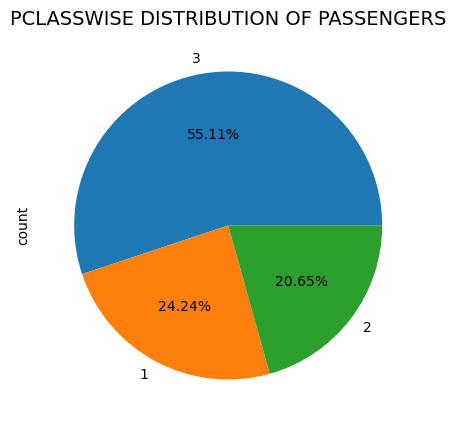

In [95]:
titanic["pclass"].value_counts().plot.pie(autopct= "%1.2f%%", figsize= (5,5))
plt.title("Pclasswise distribution of passengers".upper(), fontsize= 14)
plt.show()

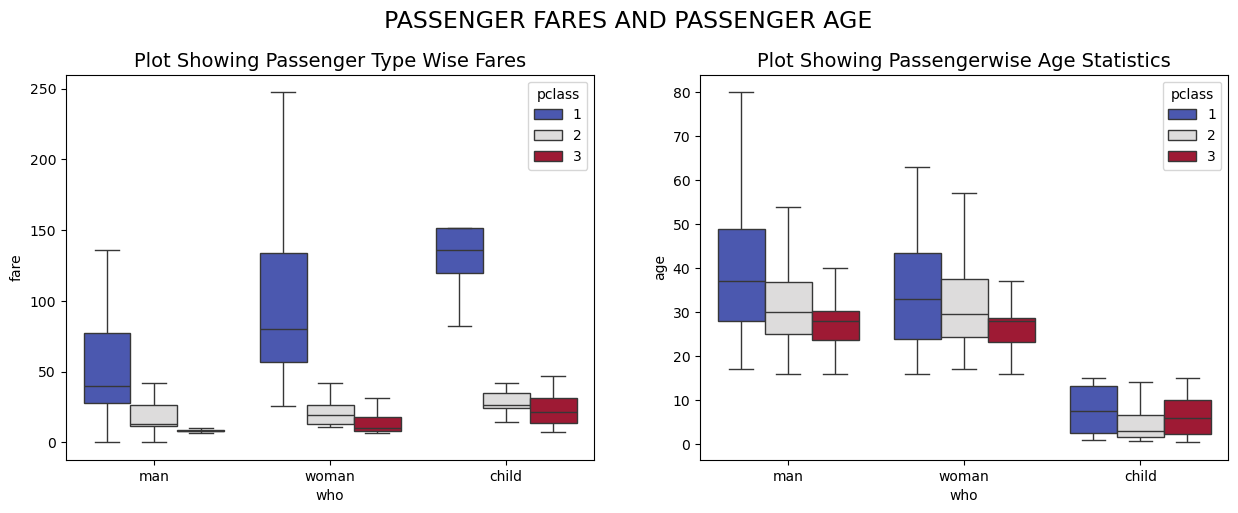

In [99]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (15, 5))
fig.suptitle("passenger fares and passenger age".upper(), fontsize= 17, y= 1.01)

ax0= sns.boxplot(x= "who", y="fare", data= titanic, palette= "coolwarm", ax= ax[0], hue= "pclass", showfliers= False)
ax0.set_title("plot showing passenger type wise fares".title(), fontsize= 14)

ax0= sns.boxplot(x= "who", y="age", data= titanic, palette= "coolwarm", ax= ax[1], hue= "pclass", showfliers= False)
ax0.set_title("plot showing passengerwise age statistics".title(), fontsize= 14)

plt.show()


SURVIVAL RATES

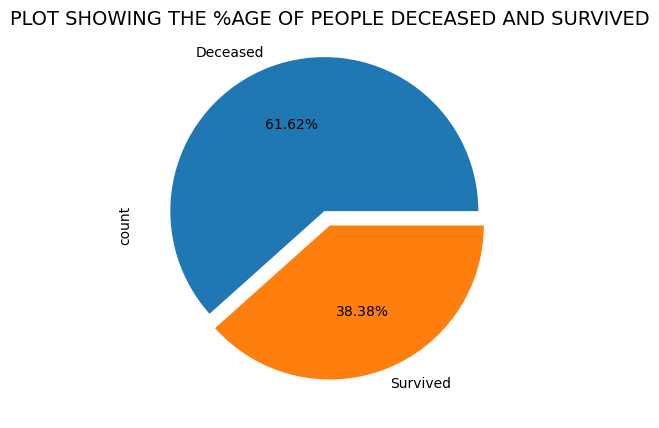

In [104]:
titanic["survived"].value_counts().plot.pie(autopct= "%1.2f%%", figsize= (5,5), labels= ["Deceased", "Survived"], explode= [0.1,0])
plt.title("Plot Showing the %age of People Deceased and Survived".upper(), fontsize= 14)
plt.show()

OBSERVATIONS:
    
    61.6% of the population lost their lives and 38.4% survived

SURVIVAL STORY

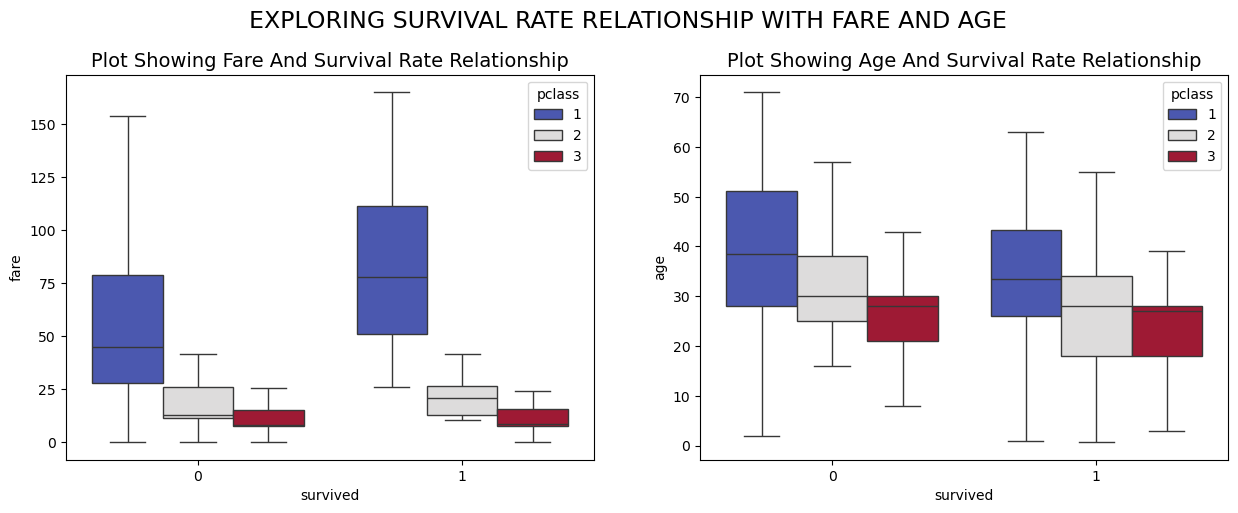

In [113]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (15, 5))
fig.suptitle("Exploring survival rate relationship with fare and age".upper(), fontsize= 17, y= 1.01)

ax0= sns.boxplot(x= "survived", y="fare", data= titanic, palette= "coolwarm", ax= ax[0], hue= "pclass", showfliers= False)
ax0.set_title("Plot showing fare and survival rate relationship".title(), fontsize= 14)

ax1= sns.boxplot(x= "survived", y="age", data= titanic, palette= "coolwarm", ax= ax[1], hue= "pclass", showfliers= False)
ax1.set_title("Plot showing age and survival rate relationship".title(), fontsize= 14)

plt.show()

OBSERVATIONS:

People paying higher fares seem to have been given preference while  evacuating the ship (in pclass 1 and 2). Data seems to support the mean, median, etc are similar for pclass = 3. These seems to a strong correlation of survival probability with higher fares.

People in lower age groups have shown higher survivability.

SURVIVAL RATES BASED ON PASSENGER TYPES

Actual Survival Statistics Based on Passenger Type

In [146]:
pass_type= titanic["who"].unique()

for person in pass_type:
    print("Total",person.title(), "boarded:", len(titanic[titanic["who"]== person])," || ",
        person.title(), "survived:", len(titanic [(titanic["who"]== person) & (titanic["survived"]== 1)]), "||",
          "Survival percentage:", (round((len(titanic [(titanic["who"]== person) & (titanic["survived"]== 1)]))/ len(titanic[titanic["who"]==person])))*100, "%")

Total Man boarded: 537  ||  Man survived: 88 || Survival percentage: 0 %
Total Woman boarded: 271  ||  Woman survived: 205 || Survival percentage: 100 %
Total Child boarded: 83  ||  Child survived: 49 || Survival percentage: 100 %


C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\1202914652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x= "who", y= "survived", data= titanic, palette= "coolwarm", ax=ax[0])


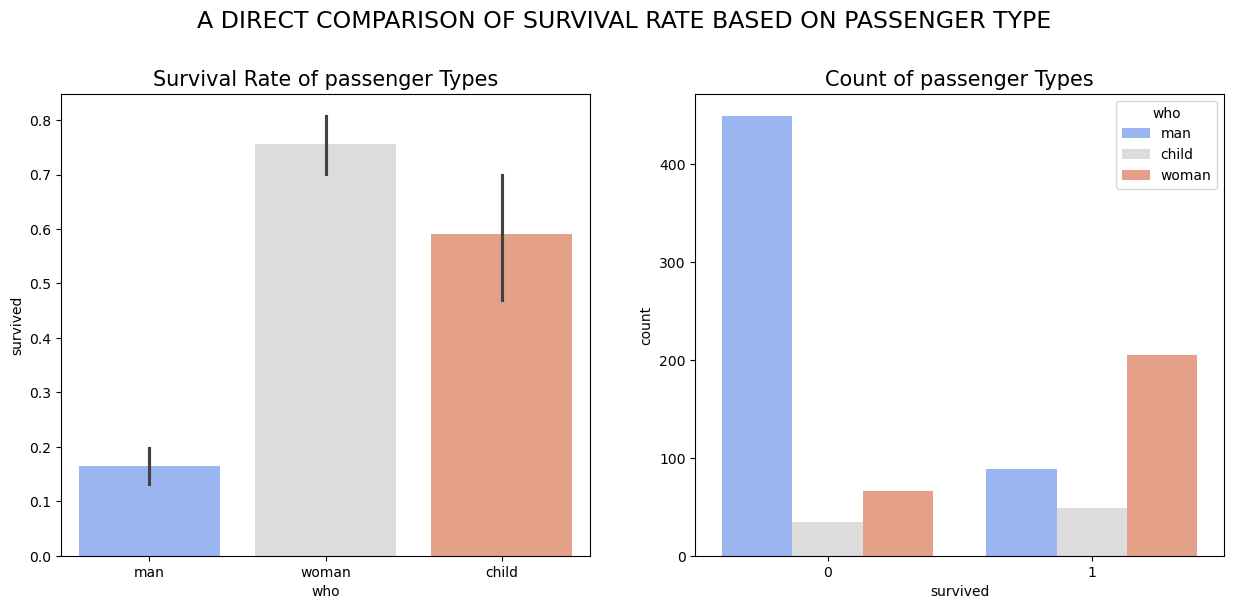

In [156]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize=(15, 6))
fig.suptitle("A Direct Comparison of Survival rate based on passenger Type".upper(), fontsize= 17, y= 1.02)

ax1= sns.barplot(x= "who", y= "survived", data= titanic, palette= "coolwarm", ax=ax[0])
ax1.set_title("Survival Rate of passenger Types", fontsize= 15)

ax2= sns.countplot(x= "survived", data= titanic, palette= "coolwarm", hue= "who", ax=ax[1])
ax2.set_title("Count of passenger Types", fontsize= 15)

plt.show()


OVERALL SURVIVAL RATE OF PEOPLE TRAVELLING ALONE

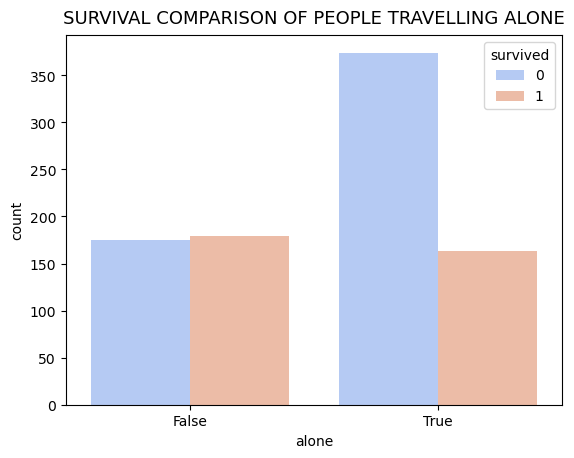

In [159]:
sns.countplot(x= "alone", data= titanic, palette= "coolwarm", hue= "survived")
plt.title("survival comparison of people travelling alone".upper(), fontsize= 13, y= 1.01)

plt.show()

OBSERVATIONS:
- People who were NOT travelling alone had 50% survival rate
- Whereas those who travelled alone, had just 30% survival rate

In [164]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,3,male,22.0,1,0,7.25,Third,man,Southampton,False


In [166]:
alone_survived= titanic[(titanic["alone"]== True) & (titanic["survived"]== 1)]
alone_decreased= titanic[(titanic["alone"]== True) & (titanic["survived"]== 0)]



C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\1310253627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.countplot(x= "pclass", data= alone_survived, palette= "coolwarm", ax=ax[0])
C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\1310253627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.countplot(x= "pclass", data= alone_decreased, palette= "coolwarm", ax=ax[1])


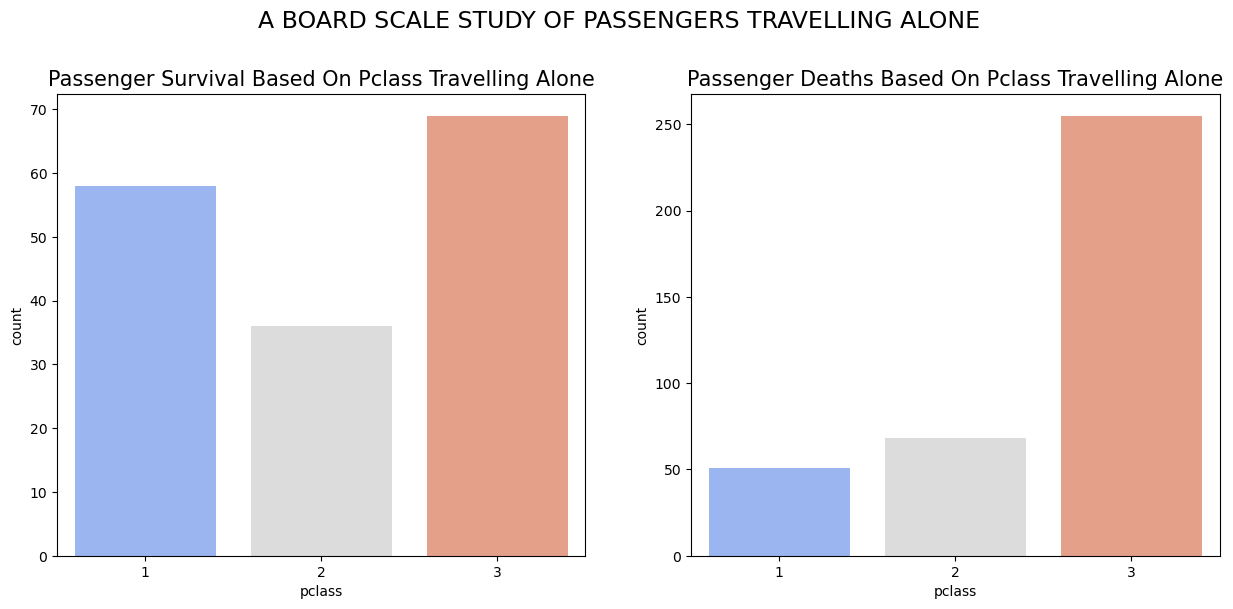

In [168]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize=(15, 6))
fig.suptitle("a board scale study of passengers travelling alone".upper(), fontsize= 17, y= 1.02)

ax1= sns.countplot(x= "pclass", data= alone_survived, palette= "coolwarm", ax=ax[0])
ax1.set_title("Passenger survival based on pclass travelling alone".title(), fontsize= 15)

ax2= sns.countplot(x= "pclass", data= alone_decreased, palette= "coolwarm", ax=ax[1])
ax2.set_title("passenger deaths based on pclass travelling alone".title(), fontsize= 15)

plt.show()

OBSERVATIONS:
- Over 250  passengers travelling alone were lost in pclass3 and only close to 70 could survive.
- In pclass2, 60 passsengers travelling alone lost their lives against 35who survived.
- In pclass3, close to 60 solo travellers survived whereas 50 lost their lives.

-Hence, for solo travellers, the best chance of survival was to travel in pclass1 wher chances of survival for such people were almost 50%

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2409779130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0= sns.countplot(x= "sex", data= alone_survived, palette= "coolwarm", ax=ax[0], order= ["female", "male"])
C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2409779130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.countplot(x= "sex", data= alone_decreased, palette= "coolwarm", ax=ax[1], order= ["female", "male"])


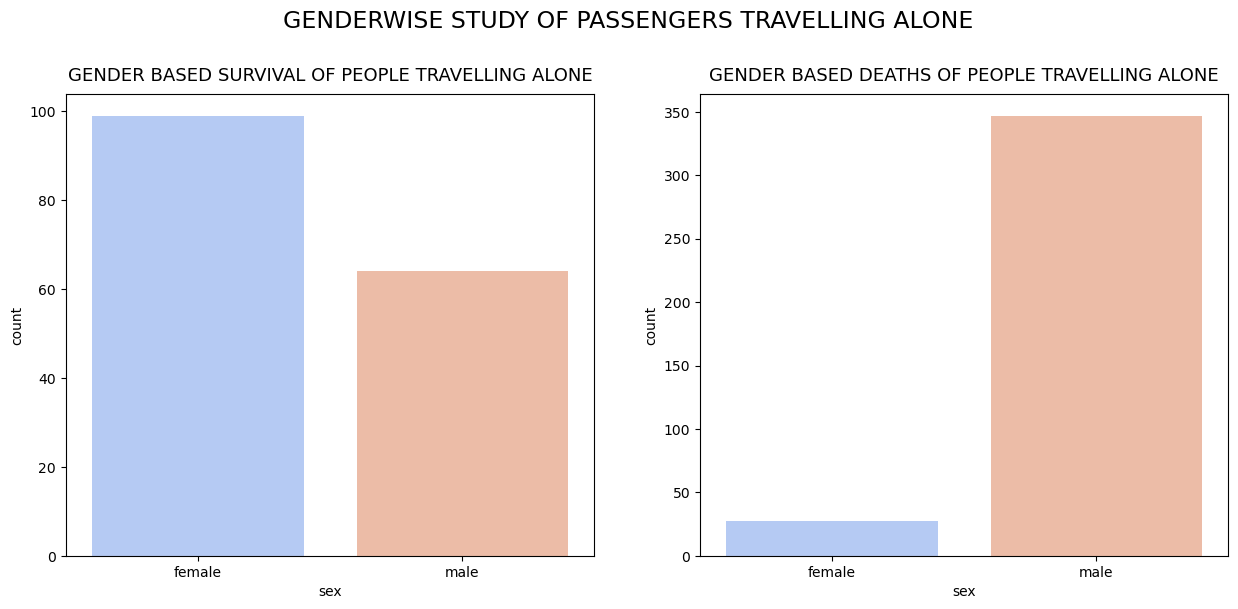

In [171]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize=(15, 6))
fig.suptitle("genderwise study of passengers travelling alone".upper(), fontsize= 17, y= 1.02)

ax0= sns.countplot(x= "sex", data= alone_survived, palette= "coolwarm", ax=ax[0], order= ["female", "male"])
ax0.set_title("gender based survival of people travelling alone".upper(), fontsize= 13, y= 1.01)

ax1= sns.countplot(x= "sex", data= alone_decreased, palette= "coolwarm", ax=ax[1], order= ["female", "male"])
ax1.set_title("gender based deaths of people travelling alone".upper(), fontsize= 13, y= 1.01)

plt.show()

OBSERVATIONS:
- Close to 100 solo female travellers were saved and 25 were lost
- Close to 55 solo traveller males were saved whereas close to 350 lost their lives.

OVERALL SURVIVAL RATE FOR PEOPLE TRAVELLING WITH SIBLINGS AND SPOUSE (SIBSP)

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\1182074889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "sibsp", y= "survived", data= titanic, palette= "coolwarm")


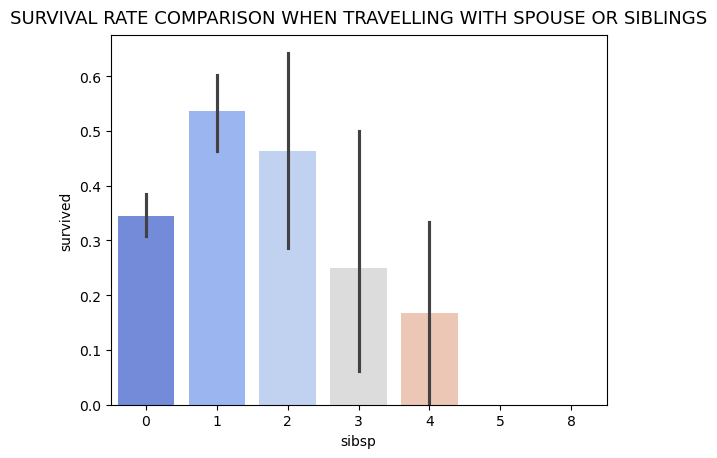

In [179]:
sns.barplot(x= "sibsp", y= "survived", data= titanic, palette= "coolwarm")
plt.title("survival rate comparison when travelling with spouse or siblings".upper(), fontsize= 13, y= 1.01)
plt.show()

OBSERVATIONS:
- Best chance of survival at 53% for people travelling with one co-passenger
- The survival rates decreased as the no. in the group increased.

OVERALL SURVIAVAL RATE FOR PEOPLE TRAVELLING WITH PARENTS OR CHILDREN (PARCH)

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\2938459544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "parch", y= "survived", data= titanic, palette= "coolwarm")


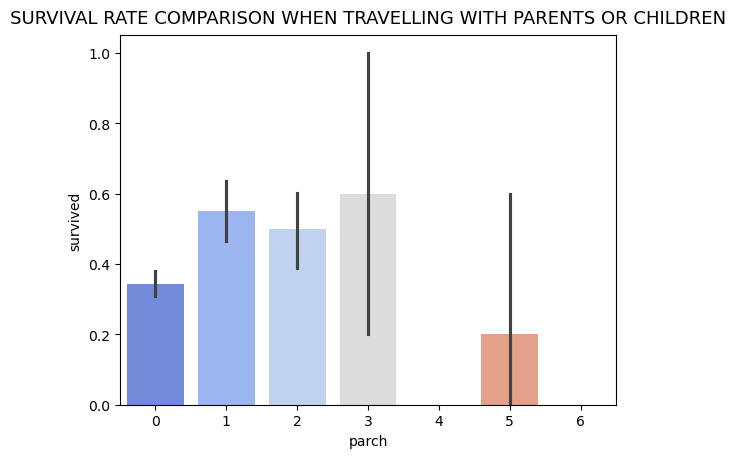

In [183]:
sns.barplot(x= "parch", y= "survived", data= titanic, palette= "coolwarm")
plt.title("survival rate comparison when travelling with parents or children".upper(), fontsize= 13, y= 1.01)
plt.show()

OBSERVATIONS:
- People travelling in group of 3 had highest chance of survival at 60%
- Variations did not point to any specific trend

PCLASS WISE SURVIVAL RATES

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_19616\1765002262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "pclass", y= "survived", data= titanic, palette= "coolwarm")


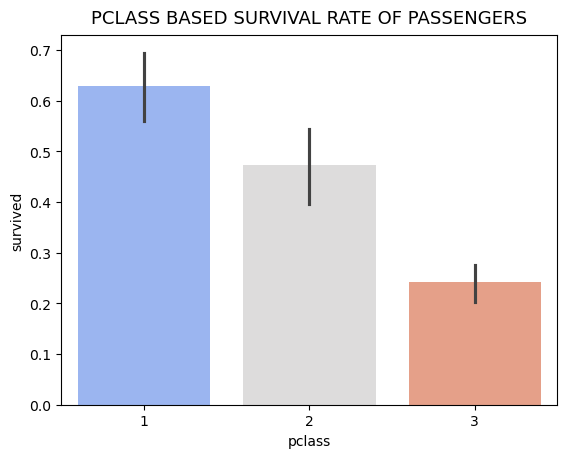

In [187]:
sns.barplot(x= "pclass", y= "survived", data= titanic, palette= "coolwarm")
plt.title("pclass based survival rate of passengers".upper(), fontsize= 13, y= 1.01)
plt.show()

OBSERVATIONS:
- The higher the PClass, the better are the chances of survival.

SURVIVAL RATES BASED ON PASSENGER AGE

In [ ]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize=(20, 7)
fig.suptitle("Passenger type comparison with agewise survival rates".upper(), fontsize= 17)

ax0= sns.kdeplot(x= "sex", data= alone_survived, palette= "coolwarm", ax=ax[0], order= ["female", "male"])
ax0.set_title("gender based survival of people travelling alone".upper(), fontsize= 13, y= 1.01)

ax1= sns.countplot(x= "sex", data= alone_decreased, palette= "coolwarm", ax=ax[1], order= ["female", "male"])
ax1.set_title("gender based deaths of people travelling alone".upper(), fontsize= 13, y= 1.01)

plt.show()